# Bank Marketing dataset

The data is related with marketing campaigns of a Portuguese banking institution that were based on phone calls. The dataset contain several attributes such as bank clients data, information about current campaign and social and economic context attributes. The classification goal is to predict whether the client will subscribe a bank term deposit.  

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('bank-additional-full.csv', sep = ';')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


There are 41.188 observations and 21 variables in data including the target variable y.

### Variables description

#### Bank client data:
1. age

2. job : type of job

3. marital : marital status

4. education

5. default: has credit in default?

6. housing: has housing loan? 

7. loan: has personal loan? 

#### Related with the last contact of the current campaign:
8. contact: contact communication type

9. month: last contact month of year

10. day_of_week: last contact day of the week

11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### Other attributes:
12. campaign: number of contacts performed during this campaign and for this client

13. pdays: number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)

14. previous: number of contacts performed before this campaign and for this client

15. poutcome: outcome of the previous marketing campaign

#### Social and economic context attributes
16. emp.var.rate: employment variation rate - quarterly indicator

17. cons.price.idx: consumer price index - monthly indicator 

18. cons.conf.idx: consumer confidence index - monthly indicator 

19. euribor3m: euribor 3 month rate - daily indicator 
   - it is calculated by eliminating the highest 15% and the lowest 15% of the interest rates submitted and calculating the
     arithmetic mean of the remaining values

20. nr.employed: number of employees - quarterly indicator 

#### Target variable:
21. y - has the client subscribed a term deposit? 

In [3]:
# Descriptive statistics for numeric data
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


The contacted clients were 40 years old in average. The average duration of communication is approximately 258 seconds (4 minutes, 3 seconds). The maximum value is 4918 seconds that could be an outlier (almost 82 minutes long communication). As we saw in the description of varaibles, duration variable is highly correlated with the target, so in case of prediting outcomes, we should exclude it. Variable campaign holds the number of contacts performed during this campaign. 75% of clients were contacted 3 times or less, and maximum value of contacts with a client is 56 times. Seems like the employees of the bank have tried to contact the client several times until they get the response. Variable pdays describe the number of day that passed by after the last contact with the client regarding previous campaign. 75% clients were not contacted in the previous campaign (999 = no previous contact). The similar result is for variable previous, that the majority of clients was not contacted. 

Variable emp.var.rate is indicator of employment rate calculated every quarter. The employment rate measures the number of employed people by the total labor force and can be calculated for cities, counties, states and countries. The average employment rate is 0.08%.

Variable cons.price.idx means consumer price index (aka CPI) which is economic indicator. It is used to measure the average changes in prices over period of time, that households pay for a basket of goods and services. Most CPI index series use 1982-1984 as the basis for comparison. [The U.S. Bureau of Labor Statistics (BLS)](https://www.bls.gov/) set the index level during this period at 100. In our dataset, the maximum CPI is approximately 94%, which means that there has been 6% decrease in the price of the market basket compared to the period of years 1982-1984.

Variable cons.conf.idx means consumer confidence index (aka CCI) which is a survey performed by monthly base. [This survey](https://tradingeconomics.com/portugal/consumer-confidence) is based on interviews with consumers about their perceptions of the current and future economic situation in the country and their tendencies to purchase. The relative value is separately computed for each question in this survey (for each question, positive responses are divided by the sum of positive and negative responses). These relative values are then compared against relative values from benchmark year 1985 ([CCI](https://en.wikipedia.org/wiki/Consumer_confidence_index)). The lowest CCI is of value -50%.


In [4]:
# Descriptive statistics for categorical variables
data.describe(include = 'object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


From the above statistics we can see that the majority of clients work in the administrative field and have university degree. Also the most of clients are married and have borrowed money for financing their houses. The most common day of the week and month when the contact with a client was performed is Thursday and May, respectively. The majority of contacted clients have not subscribed a term deposit. There are only 10 months.

# 1. Data preprocessing

In [5]:
# Renaming columns
data.rename(columns = {'marital':'marital_status','default':'default_credit','housing':'house_loan',
                      'contact':'contact_type','duration':'contact_duration','campaign':'number_of_contacts',
                      'pdays':'days_passed','previous':'number_previous_contact','poutcome':'previous_campaign_outcome',
                      'emp.var.rate':'emp_variation_rate','cons.price.idx':'cpi','cons.conf.idx':
                      'cci','euribor3m':'euribor_rate','nr.employed':'no_employees','y':'target'},
           inplace = True)

In [6]:
# Checking for missing values
data.isnull().sum()

age                          0
job                          0
marital_status               0
education                    0
default_credit               0
house_loan                   0
loan                         0
contact_type                 0
month                        0
day_of_week                  0
contact_duration             0
number_of_contacts           0
days_passed                  0
number_previous_contact      0
previous_campaign_outcome    0
emp_variation_rate           0
cpi                          0
cci                          0
euribor_rate                 0
no_employees                 0
target                       0
dtype: int64

There are no missing values stored as NaN in the dataset. However, there still could be hidden missing values that we are not able to see right now. 

In [7]:
# Finding duplicate rows
duplicated_rows = data[data.duplicated()]
duplicated_rows

,age,job,marital_status,education,default_credit,house_loan,loan,contact_type,month,day_of_week,...,number_of_contacts,days_passed,number_previous_contact,previous_campaign_outcome,emp_variation_rate,cpi,cci,euribor_rate,no_employees,target
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


Here we can see all duplicate rows except their first occurence. These rows will be removed from the dataset.

In [8]:
# Removing duplicate rows
data.drop_duplicates(inplace = True)

In [9]:
# Checking whether the duplicate rows were correctly removed
data.duplicated().sum()

0

In [10]:
# Exploring data types
data.dtypes

age                            int64
job                           object
marital_status                object
education                     object
default_credit                object
house_loan                    object
loan                          object
contact_type                  object
month                         object
day_of_week                   object
contact_duration               int64
number_of_contacts             int64
days_passed                    int64
number_previous_contact        int64
previous_campaign_outcome     object
emp_variation_rate           float64
cpi                          float64
cci                          float64
euribor_rate                 float64
no_employees                 float64
target                        object
dtype: object

In [11]:
# Converting datatype of categorical variables to 'category' datatype
to_category = ['job','marital_status','education','default_credit','house_loan', 'loan','contact_type', 
               'month','day_of_week', 'previous_campaign_outcome']

In [12]:
for col in to_category:
  data[col] = data[col].astype('category')

In [13]:
data.dtypes

age                             int64
job                          category
marital_status               category
education                    category
default_credit               category
house_loan                   category
loan                         category
contact_type                 category
month                        category
day_of_week                  category
contact_duration                int64
number_of_contacts              int64
days_passed                     int64
number_previous_contact         int64
previous_campaign_outcome    category
emp_variation_rate            float64
cpi                           float64
cci                           float64
euribor_rate                  float64
no_employees                  float64
target                         object
dtype: object

In [14]:
# Encoding target variable to 1 if the term deposit has been subscribed, 0 otherwise
data.target = data.target.apply(lambda x: 1 if x == 'yes' else 0)

In [15]:
# Month variable - abbreviations of months
data.month.unique()

[may, jun, jul, aug, oct, nov, dec, mar, apr, sep]
Categories (10, object): [may, jun, jul, aug, ..., dec, mar, apr, sep]

In [16]:
# New months labels
mapping_values = {'mar':'March', 'apr':'April','may':'May','jun':'Jun','jul':'Jul','aug':'August',
                  'sep':'September','oct':'October','nov':'November','dec':'December'}

In [17]:
# Mapping new months labels
data.month = data.month.map(mapping_values)

In [18]:
data.month

0             May
1             May
2             May
3             May
4             May
           ...   
41183    November
41184    November
41185    November
41186    November
41187    November
Name: month, Length: 41176, dtype: category
Categories (10, object): [April, August, December, Jul, ..., May, November, October, September]

In [19]:
data.day_of_week.unique()

[mon, tue, wed, thu, fri]
Categories (5, object): [mon, tue, wed, thu, fri]

In [20]:
mapping_days = {'mon':'Monday','tue':'Tuesday','wed':'Wednesday','thu':'Thursday','fri':'Friday'}

In [21]:
data.day_of_week = data.day_of_week.map(mapping_days)

# 2. Visualizations

## 2.1 Descriptive Analysis

### 2.1.1 Numerical variables

In [22]:
# Copy of dataset for visualizations
data_viz = data.copy()

In [23]:
# Setting plotting parameters
parameters = {'figure.figsize':(13, 8),
             'axes.labelsize': 11,
             'axes.titlesize':16}
plt.rcParams.update(parameters)
sns.set_style('darkgrid')

### Age variable

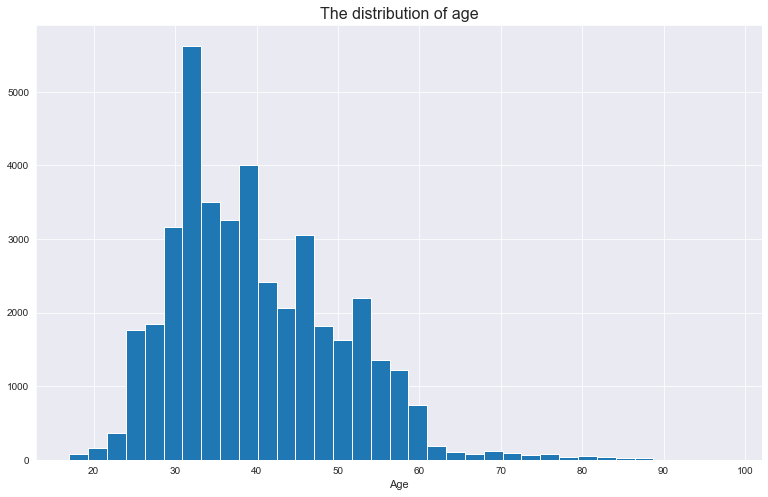

In [24]:
# The distribution of clients age
plt.hist(data_viz.age, bins = 35)
plt.title('The distribution of age')
plt.xlabel('Age');

The histogram above describes the distribution of clients' ages. The distribution is somewhat normal and rather unimodal with several peaks a little below 30, then at 40 and one peak between 40 and 50. The majority of the data points are between 30 and 40. Next, there is a very long tail after 60 years.

In [25]:
# Minimum and maximum age
print('The minimum age: {}'.format(data_viz.age.min()))
print('The maximum age: {}'.format(data_viz.age.max()))

The minimum age: 17
The maximum age: 98


In [26]:
data_viz[data_viz['age'] == 17]

,age,job,marital_status,education,default_credit,house_loan,loan,contact_type,month,day_of_week,...,number_of_contacts,days_passed,number_previous_contact,previous_campaign_outcome,emp_variation_rate,cpi,cci,euribor_rate,no_employees,target
37140,17,student,single,unknown,no,yes,no,cellular,August,Wednesday,...,3,4,2,success,-2.9,92.201,-31.4,0.884,5076.2,0
37539,17,student,single,basic.9y,no,yes,no,cellular,August,Friday,...,2,999,2,failure,-2.9,92.201,-31.4,0.869,5076.2,0
37558,17,student,single,basic.9y,no,yes,no,cellular,August,Friday,...,3,4,2,success,-2.9,92.201,-31.4,0.869,5076.2,0
37579,17,student,single,basic.9y,no,unknown,unknown,cellular,August,Friday,...,2,999,1,failure,-2.9,92.201,-31.4,0.869,5076.2,1
38274,17,student,single,unknown,no,no,yes,cellular,October,Tuesday,...,1,2,2,success,-3.4,92.431,-26.9,0.742,5017.5,1


In [27]:
data_viz[data_viz['age'] == 98]

,age,job,marital_status,education,default_credit,house_loan,loan,contact_type,month,day_of_week,...,number_of_contacts,days_passed,number_previous_contact,previous_campaign_outcome,emp_variation_rate,cpi,cci,euribor_rate,no_employees,target
38452,98,retired,married,basic.4y,unknown,yes,no,cellular,October,Friday,...,1,2,2,success,-3.4,92.431,-26.9,0.73,5017.5,1
38455,98,retired,married,basic.4y,unknown,yes,no,cellular,October,Friday,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.73,5017.5,1


There are two 17 years old client who have subscribed the term deposit. The oldest client are 98 years old, who also have subscribed the term deposit. At this point I would like to look closer at the higher ages of clients as these can be possible outliers.

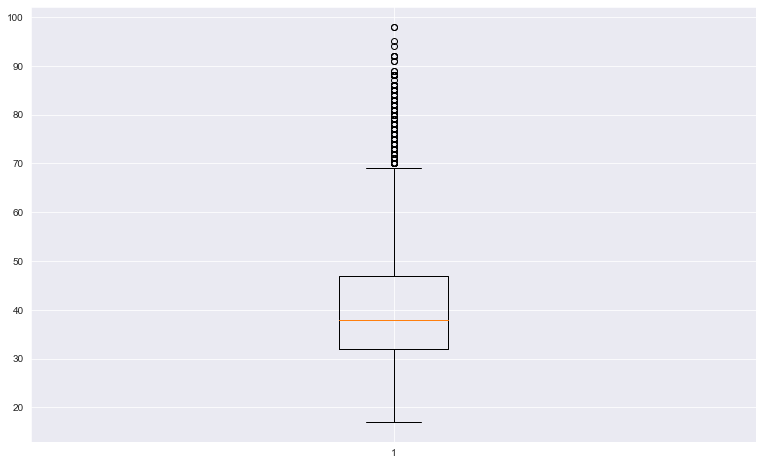

In [28]:
# Visualizing age of clients using boxplot 
plt.boxplot(data_viz.age);

The simplest way how to display possible outliers is using boxplot that shows us how the datapoint are spread out. The positive skewed distribution of datapoints reveal that every datapoint higher then 70 is outlier. One way how we can handle these outliers in age variable is using discretisation, also called binning, when continuous variable is transformed into discrete one. We´ll try to discretize age variable in Feature engineering section of this notebook.

In [29]:
age_bins = pd.qcut(data_fe['age'], 6)

NameError: name 'data_fe' is not defined

In [ ]:
print("Bin intervals:\n", age_bins.values, "\n"*3, "Amount of observation per bin", "\n", age_bins.value_counts())

### contact_duration variable

For better interpretation I will convert seconds to minutes in variable contact_duration and look at the distribution of the time.

In [ ]:
# Converting seconds to minutes 
data_viz.contact_duration = data_viz.contact_duration.apply(lambda x: x / 60)

In [ ]:
# The call duration distribution
plt.hist(data_viz.contact_duration, bins=30)
plt.title('The distribution of call duration')
plt.xlabel('Call duration');

As we can saw in the summary od descriptive statistics, the longest call with the client was 82 minutes long. The histogram shows us that the most of the calls are under 10 minutes. Now I would like to find out whether there are call with no duration.

In [ ]:
# Observations where is no duration recorded 
data_viz[data_viz['contact_duration'] == 0]

These four clients have not been contacted during the campaign. These observations will be removed because they do not provide useful information for us.

In [ ]:
# Get the index of rows that should be dropped
index_rows_to_drop = data_viz[data_viz['contact_duration'] == 0].index

In [ ]:
# Drop those rows from the dataframe
data_viz.drop(index_rows_to_drop, inplace = True)

Now we´ll look closer at the particular range of call duration by limiting x-axis.

In [ ]:
# Setting the axis limit
plt.hist(data_viz.contact_duration, bins = 50)
plt.title('The distribution of call duration up to 25 minutes')
plt.xlabel('Call duration');
plt.xlim(0, 25);

The majority of calls were approximately 3 minutes long.

### number_of_contacts variable

In [ ]:
# Number of performed contacts distribution
data.number_of_contacts.hist()
plt.title('The distribution of number of contacts performed during campaign')
plt.xlabel('Number of contacts');

In [ ]:
# The number of contacts
plt.boxplot(data_viz.number_of_contacts);

Some of the clients were contacted more than once in order to get their final answer (whether they want to subscribe the term deposit or not). Most of the clients were contacted approximately 3 times. For some clients there are large numbers of performed contacts (10-40). Even the enormous number of 56 calls.  

### days_passed variable

In [ ]:
# days_passed distribution
data_viz.days_passed.hist()
plt.title('Days passed by from contact of the previous campaign')
plt.xlabel('Number of days');

This variable contain information about the number of days that passed by after the client was last contacted from a previous campaign. Here we can see that almost all of the data points have value 999 what means that client was not previously contacted.


In [ ]:
# Visualization of days_passed variable except those clients who were not previously contacted
days_passed = data_viz.query('days_passed != 999')
days_passed.days_passed.hist()
plt.title('Days passed by for previously contacted clients.')
plt.xlabel('Number of days');

After excluding clients who have not been contacted, the number of days passed after the previous campaign is approximately 3 to 8 days for most clients. 

### 2.1.2 Categorical variables

In [ ]:
# Function to create a countplot
def create_countplot(x,order, **kwargs):
    title = kwargs.pop('title')
    xlabel = kwargs.pop('xlabel')
    ylabel = kwargs.pop('ylabel')
    plt.figure()
    sns.countplot(x, order = x.value_counts(ascending = False).index, **kwargs)
    plt.xticks(rotation = 45)
    fig = plt.gcf()
    for axis in fig.axes:
        axis.set_title(title)
        axis.xaxis.set_label_text(xlabel)
        axis.yaxis.set_label_text(ylabel)
    return axis

In [ ]:
# Categorical variables in the dataset
list(data_viz.select_dtypes(include = 'category'))

### job variable

In [ ]:
# Unique values of job variable
data_viz.job.value_counts()

In [ ]:
# Clients jobs visualization
base_color = sns.color_palette()[4]
labels = {'title':'Bank clients occupation','xlabel':'The occupation','ylabel':'Count'}
create_countplot(data_viz.job, order = data.job, color = base_color, **labels);

The majority of bank clients work in the administrative field and are 'blue-collar' workers who perform manual labor. The third common occupation is a technician. Similar counts have clients who are entrepreneurs and self-employed people. We do not have information on occupation type for 330 bank clients.

### marital_status variable

In [ ]:
# Unique values of marital status
data_viz.marital_status.value_counts()

In [ ]:
# Clients marital status visualization
labels = {'title':'Bank clients marital status','xlabel':'The marital status','ylabel':'Count'}
create_countplot(data_viz.marital_status, order = data_viz.marital_status, color = base_color, **labels);

There are 4 categories in the marital_status variable: unknown, married, single, and divorced (where divorced category means divorced or widowed). Most of the clients are married, and we do not know the marital status of 80 clients.

### education variable

In [ ]:
# Unique values of education of bank clients
data_viz.education.value_counts()

In [ ]:
# Clients education visualization
labels = {'title':'Bank clients education','xlabel':'Education','ylabel':'Count'}
create_countplot(data_viz.education, order = data_viz.education, color = base_color, **labels);

The majority of clients have university degree followed by high school education. There are 3 categories of basic school education. More than 5000 clients have stated professional course as an education. Again we missed education records for 1730 clients. 

### default_credit variable

In [ ]:
# Unique categories for default_credit variable
data_viz.default_credit.value_counts()

In [ ]:
# Default credit visualization
labels = {'title':'Credit in default','xlabel':'','ylabel':'Count'}
create_countplot(data_viz.default_credit, order = data_viz.default_credit, color = base_color, **labels);

Only 3 clients have failed to repay the debt on the time. For 8596 clients we do not have information.

### house_loan variable 

In [ ]:
# Unique values of house_loan variable
data_viz.house_loan.value_counts()

In [ ]:
# House loan visualization
labels = {'title':'House loan','xlabel':'Loan','ylabel':'Count'}
create_countplot(data_viz.house_loan, order = data_viz.house_loan, color = base_color, **labels);

More than 20.000 contacted clients have a housing loan, and 990 clients did not share this information.

### loan variable

In [ ]:
# Unique values of loan variable
data_viz.loan.value_counts()

In [ ]:
# Loan visualization
create_countplot(data_viz.loan, order = data_viz.loan, color = base_color, **labels);

The majority of clients do not have personal loans. This information is unknown for 990 clients.

### contact_type variable

In [ ]:
# Unique values of contact_type variable
data_viz.contact_type.value_counts()

In [ ]:
# Type of contact visualization
labels = {'title':'Type of contact','xlabel':'Contact type','ylabel':'Count'}
create_countplot(data_viz.contact_type, order = data_viz.contact_type, color = base_color, **labels);

There are two ways how the bank employees have contacted their clients: cellphone (cellular) or telephone.

### month variable

For visualization purposes we´ll set the order of months and days variables.

In [ ]:
# Change the order of months and define a custom CategoricalDtype
cat_order = ['February','March','April','May','Jun','Jul','August','September','October','November','December']      

In [ ]:
ordered_cat = pd.api.types.CategoricalDtype(categories = cat_order, ordered = True)

In [ ]:
data_viz.month = data_viz.month.astype(ordered_cat)

In [ ]:
# Month variable visualization
sns.countplot(data = data_viz, x = 'month', color = 'skyblue')
plt.title('Performed contacts during the year')
plt.xlabel('Month');

Most clients have been contacted through the summer from May to August.

### day_of_week variable

In [ ]:
# Change the order of days and define a custom CategoricalDtype
cat_day = ['Monday','Tuesday','Wednesday','Thursday','Friday']

In [ ]:
ordered_cat_day = pd.api.types.CategoricalDtype(categories = cat_day, ordered = True)

In [ ]:
data_viz.day_of_week = data_viz.day_of_week.astype(ordered_cat_day)

In [ ]:
# day_of_week variable visualization
sns.countplot(data = data_viz, x = 'day_of_week', color = 'skyblue')
plt.title('Performed contacts during the weekdays')
plt.xlabel('Day');

For each day, there have been performed a similar amount of calls.

### previous_campaign_outcome variable

In [ ]:
# Unique values of previous_campaign_outcome variable
data_viz.previous_campaign_outcome.value_counts()

In [ ]:
# Output of previous campaign visualization
labels = {'title':'Result of previous campaign','xlabel':'Result','ylabel':'Count'}
create_countplot(data_viz.previous_campaign_outcome, order = data_viz.previous_campaign_outcome, color = base_color, **labels);

For the major part of the records, we do not have information about previous campaign results.

### Target variable

In [ ]:
# Target variable visualization
ax = sns.countplot(data = data_viz, x = 'target')
ax.set_xticklabels(['No','Yes'])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 15), textcoords = 'offset points');

From all of the contacted clients, only 4639 of them have subscribed to a term deposit.

## 3. EDA

In this part, we aim at finding possible relationships between independent variables and the target variable.

### Job and target

In [ ]:
# Visualizing arget variable by client job
sns.countplot(data = data_viz, x = 'job', hue = 'target')
plt.title('Target by client job')
plt.xlabel('Job')
plt.xticks(rotation = 45);

Comparing the target variable with the clients' job shows that clients working in the administrative field dominate regarding term deposit subscriptions. In the second place are blue-collar workers and technicians, followed by clients who are retired and clients on the management level.

In [ ]:
# Function to create proportion of target feature
def compute_proportion(data, column):
    by_category = pd.DataFrame()
    by_category = round(data.groupby(column).target.mean()*100)
    by_category.append(by_category)
    return by_category

In [ ]:
# Computing proportion of subscription by client job
by_job = compute_proportion(data_viz, 'job')
by_job

From all the jobs above, the students have the highest subscription rate of 31%. The smallest rate have blue-collar workers, followed by clients who work in services.

### Marital status and target

In [ ]:
# Visualizing target variable by marital status of client
sns.countplot(data = data_viz, x = 'marital_status', hue = 'target')
plt.title('Target by marital_status')
plt.xlabel('Marital status');

It seems that for married people, there is a higher probability of taking the term deposit as well as for single people. People who are divorced tend to have a rather negative response to calls.

In [ ]:
by_marital = compute_proportion(data_viz, 'marital_status')
by_marital

The highest rate belongs to clients who we do not know their marital status for. In second place, there are clients who are single.

### Clients education and target

In [ ]:
sns.countplot(data = data_viz, x = 'education', hue = 'target')
plt.xticks(rotation = 45);

In [ ]:
by_ed = compute_proportion(data_viz, 'education')
by_ed

Besides 18 client who have no education (illiterate) and the clients with unknown education, the highest subscription rate have people with university degree. The same rate of 11% have clients with high school education and with professional course.

### Deafult credit and target

In [ ]:
sns.countplot(data = data_viz, x = 'default_credit', hue = 'target');

In [ ]:
by_default_credit = compute_proportion(data_viz, 'default_credit')
by_default_credit

The client who do not have credit in default have the highest subscription rate.

### Housing loan and target

In [ ]:
sns.countplot(data = data_viz, x = 'house_loan', hue = 'target');

In [ ]:
by_house_loan = compute_proportion(data_viz, 'house_loan')
by_house_loan

The subscription rate for all three categories is very similar.

### Personal loans and target

In [ ]:
sns.countplot(data = data_viz, x = 'loan', hue = 'target');

In [ ]:
by_personal_loan = compute_proportion(data_viz, 'loan')
by_personal_loan

It seems that there is no interesting relationship between the subscription rate and personal loans of the clients. The subscription rate is about the same percentage regardless the possesion of personal loan or missing this information.

### Contact type and target

In [ ]:
sns.countplot(data = data_viz, x = 'contact_type', hue = 'target');

In [ ]:
by_contact_type = compute_proportion(data_viz, 'contact_type')
by_contact_type

There is higher subscription rate if the clients were contacted through cellphone. Only 5% of clients who own telephone have subscribe the term deposit.

### Duration of calls and target variable 

### Age intervals vs target variable 

In [ ]:
sns.countplot(data = data_viz, x= 'age_range', hue = 'target');

## 3. Feature engineering

In [ ]:
# Copy of dataset for FE
data_fe = data.copy()

### Discretization of age feature

Transforming continuous variables into discrete ones can be done using several methods, either unsupervised or supervised. 
We´ll use an unsupervised method called Equal frequency discretization, which creates intervals (i.e., bins) based on variable distribution. Each bin will consist of the same amount of observations.
We´ll perform this discretization using `pandas.qcut()` function that divides the continuous variable into N quantiles; we will define that.

In [ ]:
# Binning ages
bins = [17, 25, 35, 45, 55, 65, 75]
labels = ['17-24', '25-34', '35-44', '45-54', '55-64', '65+']
data_viz['age_range'] = pd.cut(data_viz.age, bins, labels = labels, include_lowest = True)

In [ ]:
sns.countplot(data = data_viz, x= 'age_range', hue = 'target');

The graph above displays bank clients separated into the age ranges along with the target variable. However the last group is barely visible, so we are not able to make precise comparison. Therefore we would like to visualize rather the proportions of these age ranges using percent stacked barplot where the data are normalized.

In [ ]:
# Grouping age_range and target variables
data_2 = data_viz.groupby(['age_range','target']).age_range.count().unstack()

In [ ]:
data_2

Here we can see all of the age ranges and related counts of target variable. To create proportions we need to divide counts for 0 and 1 by total count for each age range.

In [ ]:
# Computing the proportions
data_2 = data_2.div(data_2.sum(axis = 1),axis = 0)

In [ ]:
data_2

In [ ]:
# Percentage stacked barplot
ax = data_2.plot.bar(stacked = True)
y_values = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in y_values])
plt.xticks(rotation = 45)
plt.legend(loc = 'upper left', ncol = 2, framealpha = 0.1)
plt.title('The term deposit subscription by age ranges')
plt.xlabel('Age range');

Using the percentage stacked bar chart we can compare our age ranges, observe the differences and see the trend. The middle age ranges (35-44 and 45-54) are very similar with approximately 8% of clients who have subscribed the term deposit. Approximately 21% of the youngest clients belonging to 17-24 age range have subscribed the term deposit. This bar chart also nicely displays the last age range. We can see that more than 40% of contacted clients now own the term deposit.

### Sources

https://stackoverflow.com/questions/31357611/format-y-axis-as-percent

https://pbpython.com/pandas_dtypes_cat.html

https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots

https://www.tutorialspoint.com/matplotlib/matplotlib_setting_ticks_and_tick_labels.htm